In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.datasets import load_files
import numpy as np
import cv2
from keras.utils import np_utils
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"
test_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/test"

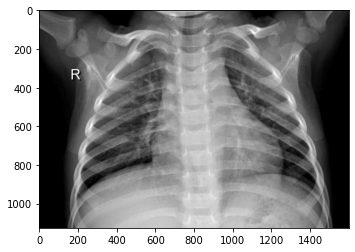

In [3]:
from tensorflow.keras.utils import load_img, img_to_array
temp_image = load_img(train_path + "/NORMAL/IM-0125-0001.jpeg")
plt.imshow(temp_image) 


In [4]:
x = img_to_array(temp_image)
x.shape # 3 means rgb

(1125, 1600, 3)

In [94]:
from glob import glob
className = glob(train_path + "/*") # take all name in train path...
numberOfClass = len(className)
className

['/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA',
 '/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL']

In [6]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,# feature scaling
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 color_mode = "rgb",
                                                 class_mode = 'binary')

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            color_mode = "rgb",
                                            class_mode = 'binary')



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [75]:
def VGG16():

    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (128,128,3), activation = "relu"))
    model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))

    model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu"))
    model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
    model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))

    model.add(Flatten())
    model.add(Dense(1024, activation = "relu"))
    model.add(Dropout(0.5))

    
    
    model.add(tf.keras.layers.Flatten())
    
# Full Connection
    model.add(tf.keras.layers.Dense(units = 1024, activation = "relu"))
    model.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

    return model

In [78]:
model = VGG16()

In [79]:
from tensorflow.keras.optimizers import Adam
import keras
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer= "rmsprop", loss="binary_crossentropy", metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_111 (Conv2D)          (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 12544)            

In [81]:
es=EarlyStopping(monitor='val_accuracy', mode='auto', verbose=1, patience=20)
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [69]:
batch_size = 32

In [82]:
hist = model.fit_generator(generator = training_set,
                           validation_data = test_set, 
                           epochs = 100, 
                           steps_per_epoch = 20,
                           validation_steps =10,
                          callbacks = [checkpoint])

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
20/20 [==============================] - 22s 1s/step - loss: 1.0205 - accuracy: 0.7312 - val_loss: 0.6619 - val_accuracy: 0.5938
Epoch 2/100
20/20 [==============================] - 21s 1s/step - loss: 0.6227 - accuracy: 0.7328 - val_loss: 0.9963 - val_accuracy: 0.3812
Epoch 3/100
20/20 [==============================] - 20s 1s/step - loss: 0.6129 - accuracy: 0.6969 - val_loss: 0.5794 - val_accuracy: 0.7437
Epoch 4/100
20/20 [==============================] - 20s 1s/step - loss: 0.5008 - accuracy: 0.7812 - val_loss: 0.4730 - val_accuracy: 0.7688
Epoch 5/100
20/20 [==============================] - 20s 996ms/step - loss: 0.4211 - accuracy: 0.8172 - val_loss: 0.5722 - val_accuracy: 0.7188
Epoch 6/100
20/20 [==============================] - 20s 1s/step - loss: 0.5098 - accuracy: 0.8203 - val_loss: 0.4495 - val_accuracy: 0.7625
Epoch 7/100
20/20 [==============================] - 20s 995ms/step - loss: 0.3739 - accuracy: 0.8375 - val_loss: 0.8831 - val_accuracy: 0.7375
Epoch 8

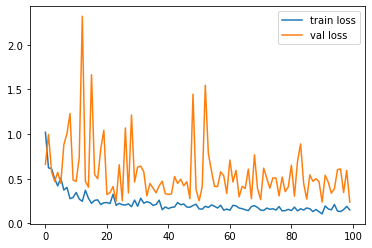

In [83]:
plt.plot(hist.history["loss"], label = "train loss")
plt.plot(hist.history["val_loss"], label = "val loss")
plt.legend()
plt.show()

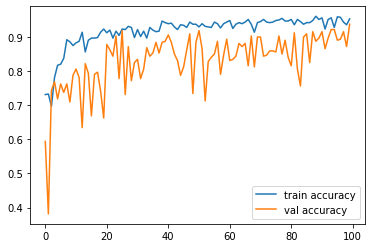

In [84]:
plt.plot(hist.history["accuracy"], label = "train accuracy")
plt.plot(hist.history["val_accuracy"], label = "val accuracy")
plt.legend()
plt.show()

it will get better...

In [110]:
# make a single prediction
test_image_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1012_bacteria_2943.jpeg"
test_image = tf.keras.preprocessing.image.load_img(test_image_path, target_size = (128,128))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0) 
result_class = np.argmax(result, axis = 1)
print(training_set.class_indices)

# for binary classification
if (result > 0.5):
    print("PNEUMONIA")
else:
    priint("NORMAL")
    

{'NORMAL': 0, 'PNEUMONIA': 1}
PNEUMONIA
